In [24]:
# 导包
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn import tree, datasets, svm

In [63]:
# 模型调参
train = pd.read_csv('./data/train.csv')
examples = train.drop(['userid', 'label'], axis = 1)
labels   = train[['label']]
X_train = examples
y_train = labels
# X_train, X_test, y_train, y_test = train_test_split(examples, labels, test_size=0.01, random_state=0)
c, r = y_train.shape
print(c, r)
y_train = np.array(y_train).reshape(c,)
# 做回归 or 做分类
param ={'n_estimators':range(1,500,10)}  
gsearch1= GridSearchCV(estimator = RandomForestClassifier(),   
                       param_grid =param,scoring='roc_auc',cv=5) # 5折交叉
gsearch1.fit(X_train,y_train)  
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



4103 1


c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.74815, std: 0.02717, params: {'n_estimators': 1},
  mean: 0.88966, std: 0.01576, params: {'n_estimators': 11},
  mean: 0.89425, std: 0.01193, params: {'n_estimators': 21},
  mean: 0.90377, std: 0.01393, params: {'n_estimators': 31},
  mean: 0.90445, std: 0.01152, params: {'n_estimators': 41},
  mean: 0.90513, std: 0.01438, params: {'n_estimators': 51},
  mean: 0.90805, std: 0.01374, params: {'n_estimators': 61},
  mean: 0.90583, std: 0.01178, params: {'n_estimators': 71},
  mean: 0.90858, std: 0.01230, params: {'n_estimators': 81},
  mean: 0.90886, std: 0.01503, params: {'n_estimators': 91},
  mean: 0.91017, std: 0.01376, params: {'n_estimators': 101},
  mean: 0.91180, std: 0.01377, params: {'n_estimators': 111},
  mean: 0.91103, std: 0.01551, params: {'n_estimators': 121},
  mean: 0.90938, std: 0.01391, params: {'n_estimators': 131},
  mean: 0.90915, std: 0.01291, params: {'n_estimators': 141},
  mean: 0.91028, std: 0.01227, params: {'n_estimators': 151},
  mean: 0.91062, st

c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


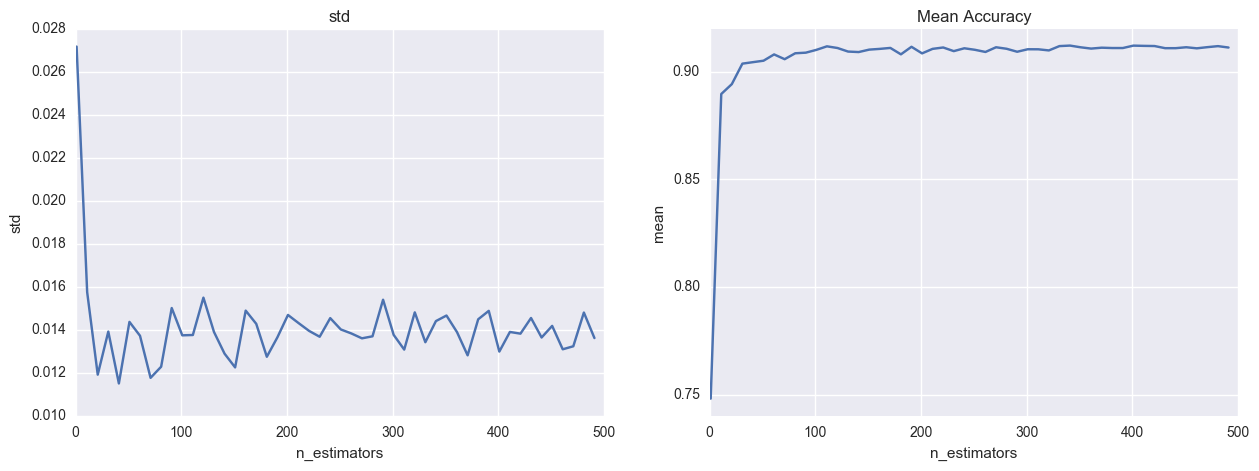

In [64]:
# 可视化训练参数
def plotGridSearch(gsearch, paramsName):
        fig,(axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
        mean = [s[1] for s in gsearch1.grid_scores_]
        std  = [np.std(s[2]) for s in gsearch1.grid_scores_]
        params = [s[0][paramsName] for s in gsearch1.grid_scores_]

        plt.plot(params, mean)
        plt.xlabel(paramsName)
        plt.ylabel('mean')
        plt.title('Mean Accuracy')
        plt.sca(axis1)
        
        plt.plot(params, std)
        plt.xlabel(paramsName)
        plt.ylabel('std')
        plt.title('std')
        plt.sca(axis2)
        # 展示图片
        plt.show()
        
plotGridSearch(gsearch1, 'n_estimators')

In [66]:
# 模型调参 gini or entropy
train = pd.read_csv('./data/train.csv')
examples = train.drop(['userid', 'label'], axis = 1)
labels   = train[['label']]
X_train = examples
y_train = labels
# X_train, X_test, y_train, y_test = train_test_split(examples, labels, test_size=0.01, random_state=0)
c, r = y_train.shape
y_train = np.array(y_train).reshape(c,)

param ={'criterion': ('entropy', 'gini')}  
gsearch1= GridSearchCV(estimator = RandomForestClassifier(n_estimators = 341),   
                       param_grid = param,scoring='roc_auc',cv=5) # 5折交叉验证
gsearch1.fit(X_train,y_train)  
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.91259, std: 0.01258, params: {'criterion': 'entropy'},
  mean: 0.91135, std: 0.01369, params: {'criterion': 'gini'}],
 {'criterion': 'entropy'},
 0.91258905124851919)

In [68]:
# 模型调参 最大特征数 后期可以增大特征数
train = pd.read_csv('./data/train.csv')
examples = train.drop(['userid', 'label'], axis = 1)
labels   = train[['label']]
X_train = examples
y_train = labels
# X_train, X_test, y_train, y_test = train_test_split(examples, labels, test_size=0.33, random_state=0)
c, r = X_train.shape
y_train = np.array(y_train).reshape(c,)
print(c, r)
param ={'max_features': range(1,c + 1,1)}  
gsearch1= GridSearchCV(estimator = RandomForestClassifier(n_estimators = 341,criterion = 'entropy'),   
                       param_grid =param,scoring='roc_auc',cv=5) # 5折交叉验证
gsearch1.fit(X_train,y_train)  
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

plotGridSearch(gsearch1, 'max_features')

KeyboardInterrupt: 

c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
c

{'max_depth': 10} 0.890047863187


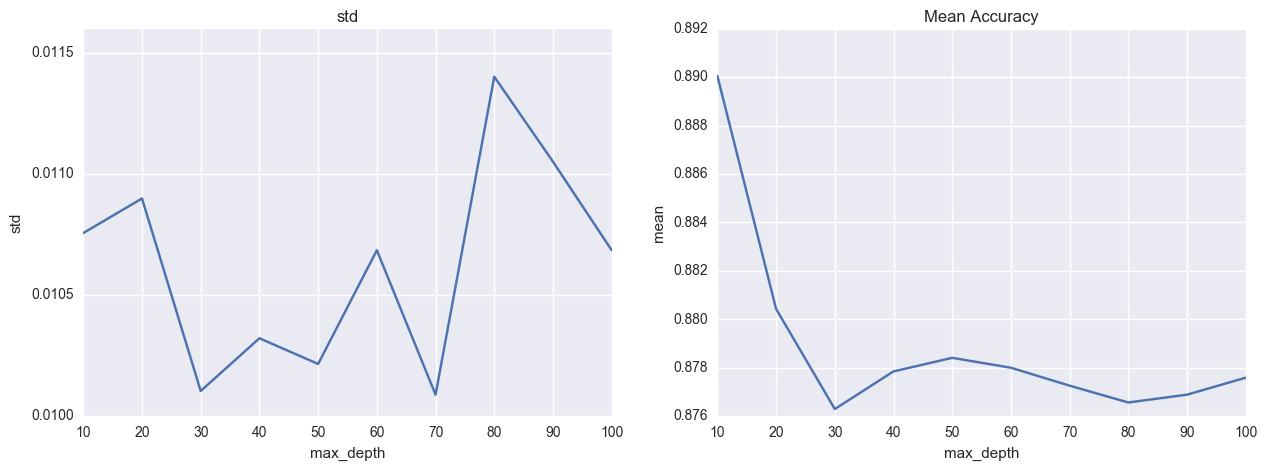

In [7]:
# 模型调参 递归深度
train = pd.read_csv('./data/train.csv')
examples = train.drop(['userid', 'label'], axis = 1)
labels   = train[['label']]
X_train = examples
y_train = labels
X_train, X_test, y_train, y_test = train_test_split(examples, labels, test_size=0.33, random_state=0)
c, r = y_train.shape
y_train = np.array(y_train).reshape(c,)

param ={'max_depth': range(10,101,10)}  
gsearch1= GridSearchCV(estimator = RandomForestRegressor(n_estimators = 351,criterion = 'mse', max_features = 4),   
                       param_grid =param,scoring='roc_auc',cv=5) # 5折交叉验证
gsearch1.fit(X_train,y_train)  
gsearch1.grid_scores_ 
# 得分最高的模型
print(gsearch1.best_params_, gsearch1.best_score_)

plotGridSearch(gsearch1, 'max_depth')

In [ ]:
# 模型调参 最大叶节点数
train = pd.read_csv('./data/train.csv')
examples = train.drop(['userid', 'label'], axis = 1)
labels   = train[['label']]
X_train = examples
y_train = labels
X_train, X_test, y_train, y_test = train_test_split(examples, labels, test_size=0.33, random_state=0)
c, r = y_train.shape
y_train = np.array(y_train).reshape(c,)

param ={'max_leaf_nodes': range(2500,3400,100)}  
gsearch1= GridSearchCV(estimator = RandomForestRegressor(n_estimators = 351,criterion = 'mse', max_features = 4, max_depth = 10),   
                       param_grid =param,scoring='roc_auc',cv=5) # 5折交叉验证
gsearch1.fit(X_train,y_train)  
gsearch1.grid_scores_ 
# 得分最高的模型
print(gsearch1.best_params_, gsearch1.best_score_)

plotGridSearch(gsearch1, 'max_leaf_nodes')

In [62]:
# 模型训练
train = pd.read_csv('./data/train.csv')
examples = train.drop(['userid', 'label'], axis = 1)
# 检查是否有缺失值
# print(np.isnan(train).any())

labels   = train[['label']]
X_train = examples
y_train = labels
c, r = X_train.shape

print(X_train.shape)
print(y_train.shape)
y_train = np.array(y_train).reshape(c,)

# 回归要比分类表现好
cls = RandomForestClassifier(n_estimators = 351)
#cls = RandomForestRegressor(n_estimators = 351) 
cls.fit(X_train, y_train)
score = cls.score(X_train, y_train)
print(score)

test = pd.read_csv('./data/test/test.csv')
x_test = test.drop(['userid'], axis = 1)
predicts  = cls.predict_proba(x_test)[:,1]

submission = pd.DataFrame({
    "orderType" : predicts,
    "userid" : test["userid"]
}, columns = ['userid', 'orderType'])

submission.to_csv('test.csv',index = False)

(4103, 175)
(4103, 1)
1.0


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import neighbors
from sklearn import linear_model
from sklearn import svm
from sklearn import model_selection

# load training&test set
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data//test/test.csv')
idcol = 'userid'
target = 'label'
drop_tags = [idcol, target]
#drop_tags = [idcol, target,
#             'actiontype_last_1', 'actiontype_last_2', 'actiontype_last_3', 'actiontype_last_4', 'actiontype_last_5', 'actiontype_last_6', 'actiontype_last_7', 'actiontype_last_8', 'actiontype_last_9', 'actiontype_last_10', 'actiontype_last_11', 'actiontype_last_12', 'actiontype_last_13', 'actiontype_last_14', 'actiontype_last_15', 'actiontype_last_16', 'actiontype_last_17', 'actiontype_last_18', 'actiontype_last_19', 'actiontype_last_20',
#             'actiontime_last_1', 'actiontime_last_2', 'actiontime_last_3', 'actiontime_last_4', 'actiontime_last_5', 'actiontime_last_6', 'actiontime_last_7', 'actiontime_last_8', 'actiontime_last_9', 'actiontime_last_10', 'actiontime_last_11', 'actiontime_last_12', 'actiontime_last_13', 'actiontime_last_14', 'actiontime_last_15', 'actiontime_last_16', 'actiontime_last_17', 'actiontime_last_18', 'actiontime_last_19', 'actiontime_last_20']
x_tags = [x for x in df_train.columns if x not in drop_tags]
y_tag = target

X_train = np.array(df_train[x_tags])
y_train = np.array(df_train[y_tag])

print(X_train.shape)
print(y_train.shape)

X_test = np.array(df_test[x_tags])
print(X_test.shape)

# prediction model
np.random.seed(314)
model_rf = ensemble.RandomForestClassifier(n_estimators=200, oob_score=True)
model_rf.fit(X_train, y_train)
y_train_pred = model_rf.predict(X_train)
y_train_predprob = model_rf.predict_proba(X_train)[:,1] # 取第1列的值作为预测值
importances = model_rf.feature_importances_

print('score_AUC:', round(metrics.roc_auc_score(y_train, y_train_predprob), 5))
print('score_precision:', round(metrics.accuracy_score(y_train, y_train_pred), 5))
scores_cross = model_selection.cross_val_score(model_rf, X_train, y_train, cv = 5, scoring='roc_auc')
print('score_cross:', round(np.mean(scores_cross), 5), 'std:', round(np.std(scores_cross), 5))

# write out prediction on test set
#y_test_pred = clf.predict(X_test)
y_test_pred = model_rf.predict_proba(X_test)[:,1]

submission = pd.DataFrame({
    "orderType" : y_test_pred,
    "userid" : test["userid"]
}, columns = ['userid', 'orderType'])
submission.to_csv('./result/PD_20171229_21.csv',index = False)

(4103, 175)
(4103,)
(10076, 175)
score_AUC: 1.0
score_precision: 1.0
score_cross: 0.90863 std: 0.01494
